In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
iris=datasets.load_iris()
x_vals=np.array([x[0:3] for x in iris.data])
y_vals=np.array([x[3] for x in iris.data])

In [3]:

#Disabling tensorflow version2
#Create a graph using session

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Your TensorFlow 1.x code using Session goes here
sess = tf.Session()
# ... Rest of your code using the session

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
#Set Seed

seed=3
tf.set_random_seed(seed)
np.random.seed(seed)

In [5]:
#Split data into train/test=80%/20%

train_indices=np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices=np.array(list(set(range(len(x_vals)))-set(train_indices)))
x_vals_train=x_vals[train_indices]
x_vals_test=x_vals[test_indices]
y_vals_train=y_vals[train_indices]
y_vals_test=y_vals[test_indices]

In [6]:
#Normalize by column (min-max norm)
def normalize_cols(m):
  col_max=m.max(axis=0)
  col_min=m.min(axis=0)
  return (m-col_min)/(col_max-col_min)

x_vals_train=np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test=np.nan_to_num(normalize_cols(x_vals_test))

In [7]:
#Declare batch size

batch_size=50

In [8]:
#Initialize placeholder

x_data=tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target=tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [9]:
#Create Variables for both Neural Network layers

hidden_layer_nodes=10
A1=tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1=tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2=tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2=tf.Variable(tf.random_normal(shape=[1]))

In [10]:
#Declare model operation

hidden_output=tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output=tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2), name="op_to_restore")

In [11]:
#Declare Loss function

loss=tf.reduce_mean(tf.square(y_target - final_output))

In [12]:
#Declare optimizer

my_opt=tf.train.GradientDescentOptimizer(0.005)
train_step=my_opt.minimize(loss)

In [13]:
#Initialize variables

init=tf.global_variables_initializer()
sess.run(init)

In [14]:
#Training loop

loss_vec=[]
test_loss=[]
for i in range(500):
  rand_index=np.random.choice(len(x_vals_train), size=batch_size)
  rand_x=x_vals_train[rand_index]
  rand_y=np.transpose([y_vals_train[rand_index]])
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

  temp_loss=sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec.append(np.sqrt(temp_loss))

  test_temp_loss=sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
  test_loss.append(np.sqrt(test_temp_loss))
  if (i+1)%50==0:
    print('Generation:'+str(i+1)+'.Loss='+str(temp_loss))

Generation:50.Loss=1.7714
Generation:100.Loss=2.077
Generation:150.Loss=1.9721999
Generation:200.Loss=1.8005999
Generation:250.Loss=2.1964
Generation:300.Loss=1.8471999
Generation:350.Loss=1.9189999
Generation:400.Loss=1.989
Generation:450.Loss=2.0362
Generation:500.Loss=1.8454


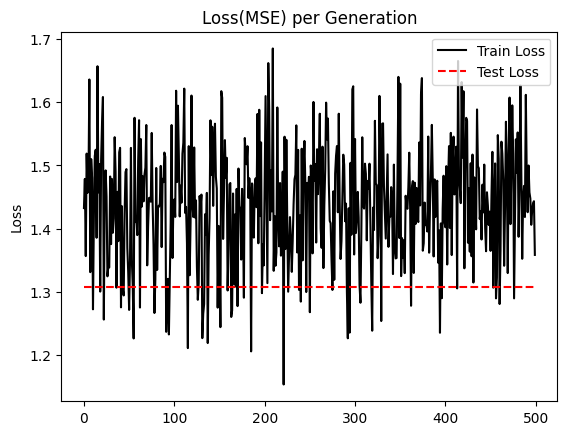

In [15]:
#Plot Loss (MSE) over time

plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss(MSE) per Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [16]:
saver=tf.train.Saver()